In [27]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMRegressor 
from bayes_opt import BayesianOptimization

In [29]:
test_df = pd.read_csv('../Data/test_df.csv')
train_df = pd.read_csv('../Data/train_df.csv')

In [30]:
test_df

,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Model_0,Model_1,Model_2,...,Benz_1,Benz_2,Benz_3,L,Transmission_0,Transmission_1,Transmission_2,Transmission_3,Price_USD,Special
0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,2.2,0,0,0,1,10.056252,False
1,0,0,0,0,0,1,1,0,0,0,...,0,0,1,3.0,0,0,0,1,9.928180,False
2,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1.4,0,0,1,0,8.434029,False
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,2.5,0,0,1,0,8.824825,False
4,0,0,0,0,0,1,1,0,0,0,...,0,1,1,1.8,0,0,1,0,8.809863,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14340,0,0,0,0,0,1,1,0,1,0,...,1,0,1,4.0,0,0,0,1,12.282575,False
14341,0,0,0,0,0,1,0,0,0,0,...,0,1,1,-100.0,0,0,0,1,8.853808,False
14342,0,0,1,1,0,1,0,0,0,0,...,1,1,0,-100.0,0,0,0,1,10.615236,False
14343,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1.5,0,0,1,0,8.594339,True


In [31]:
train_df

,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Model_0,Model_1,Model_2,...,Benz_1,Benz_2,Benz_3,L,Transmission_0,Transmission_1,Transmission_2,Transmission_3,Price_USD,Special
0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,2.0,0,0,0,1,9.210340,False
1,0,0,0,1,0,1,0,0,0,0,...,0,1,1,1.6,0,0,1,0,9.047939,False
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1.6,0,0,1,0,9.259226,False
3,0,0,1,1,1,0,0,0,0,0,...,0,0,1,1.9,0,0,1,0,8.331105,True
4,0,0,0,1,1,0,1,0,0,0,...,0,1,0,2.0,0,0,1,0,8.881975,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57373,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1.4,0,0,1,0,8.575651,False
57374,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1.4,0,0,1,0,8.497195,False
57375,0,0,0,0,0,1,1,0,0,1,...,0,0,1,1.7,0,0,1,0,8.101981,False
57376,0,0,0,1,0,1,1,0,0,1,...,0,0,1,2.0,0,0,0,1,10.621205,False


In [32]:
train_df.Price_USD.apply(np.expm1)

0         9999.0
1         8500.0
2        10500.0
3         4150.0
4         7200.0
          ...   
57373     5300.0
57374     4900.0
57375     3300.0
57376    40994.0
57377     8800.0
Name: Price_USD, Length: 57378, dtype: float64

In [33]:
X = train_df.drop('Price_USD', axis=1)
y = train_df.Price_USD
X_test = test_df.drop('Price_USD', axis=1)
y_test = test_df.Price_USD

In [34]:
train_set = lgb.Dataset(data=X, label=y)
test_set =  lgb.Dataset(data=X_test, label=y_test)

In [35]:
clf = lgb.LGBMRegressor()
clf.fit(X, y)

LGBMRegressor()

In [36]:
default_params = clf.get_params()
del default_params['n_estimators']
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [37]:
y_pred = clf.predict(X)
y_pred

array([ 9.34988854,  9.03518721,  8.93445912, ...,  8.52314872,
       10.47660006,  9.1028308 ])

In [38]:
np.expm1(y_pred)

array([11496.54184453,  8392.2846003 ,  7588.03041297, ...,
        5028.86648878, 35474.58740059,  8979.67922014])

In [39]:
mean_squared_error(y, y_pred)

0.03794250993283984

In [40]:
params = {'subsample': 0.3,
 'reg_lambda': 1.3,
 'reg_alpha': 0.2777777777777778,
 'num_leaves': 22,
 'max_depth': 7,
 'learning_rate': 0.09743846153846154}

In [41]:
clf_2 = LGBMRegressor(**params)
clf_2.fit(X, y)

LGBMRegressor(learning_rate=0.09743846153846154, max_depth=7, num_leaves=22,
              reg_alpha=0.2777777777777778, reg_lambda=1.3, subsample=0.3)

In [42]:
mean_squared_error(y, clf_2.predict(X))

0.04443762046041906

In [43]:
mean_squared_error(y_test, clf_2.predict(X_test))

0.04724189190692751

In [44]:
np.expm1(clf_2.predict(X))

array([11962.65778923,  8342.71167411,  7513.42012236, ...,
        5146.76107658, 35491.93056998,  9159.18828731])

In [45]:
np.expm1(y)

0         9999.0
1         8500.0
2        10500.0
3         4150.0
4         7200.0
          ...   
57373     5300.0
57374     4900.0
57375     3300.0
57376    40994.0
57377     8800.0
Name: Price_USD, Length: 57378, dtype: float64

In [46]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()

def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

### Bayesian Optimization

In [51]:
def search_params(X, y, param_dict:dict) -> dict:
    trainXY = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # check dict for params
    def_params = ['max_depth', 'num_leaves', 'n_estimators', 'learning_rate', 'subsample', 'colsample_bytree', 'lambda_l1', 'lambda_l2', 'min_child_weight']
    if len(param_dict) != len(def_params):
        raise ValueError(f"Not all params passed\n needed params{def_params}")
    for key in param_dict.keys():
        if key not in def_params:
            raise ValueError(f"Invalid param: {key}")\
    # define the lightGBM cross validation       
    def lightGBM_CV(max_depth, num_leaves, n_estimators, learning_rate, subsample, colsample_bytree, 
                lambda_l1, lambda_l2, min_child_weight, train=None):
    
        params = {'boosting_type': 'gbdt', 'objective': 'regression', 'metric':'rmse', 'verbose': -1,
                  'early_stopping_round':100}
        
        params['max_depth'] = int(round(max_depth))
        params["num_leaves"] = int(round(num_leaves))
        params["n_estimators"] = int(round(n_estimators))
        params['learning_rate'] = learning_rate
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_child_weight'] = min_child_weight
    
        score = lgb.cv(params, trainXY, nfold=5, seed=1, stratified=False, verbose_eval =False, metrics=['rmse'])

        return -np.min(score['rmse-mean']) # return negative rmse to minimize rmse 
    # use bayesian optimization to search for the best hyper-parameter combination
    lightGBM_Bo = BayesianOptimization(lightGBM_CV, param_dict, random_state=17, verbose=-1)
    lightGBM_Bo.maximize(init_points=5, n_iter=25) 
    
    params_set = lightGBM_Bo.max['params']
    
    # get the params of the maximum target     
    max_target = -np.inf
    for i in lightGBM_Bo.res: # loop thru all the residuals 
        if i['target'] > max_target:
            params_set = i['params']
            max_target = i['target']
    
    params_set.update({'verbose': -1})
    params_set.update({'metric': 'rmse'})
    params_set.update({'boosting_type': 'gbdt'})
    params_set.update({'objective': 'regression'})
    params_set['max_depth'] = int(round(params_set['max_depth']))
    params_set['num_leaves'] = int(round(params_set['num_leaves']))
    params_set['n_estimators'] = int(round(params_set['n_estimators']))
    params_set['seed'] = 1 #set seed
    
    return params_set

In [52]:
test_params = {
  'max_depth': (5,100),
  'num_leaves': (20, 100),
  'n_estimators': (100, 10000),
  'learning_rate': (0.01, 0.3),
  'subsample': (0.7, 0.8),
  'colsample_bytree' : (0.5,1),
  'lambda_l1': (0, 5),
  'lambda_l2': (0, 3),
  'min_child_weight': (2, 50) 
}
best_params = search_params(X,y,test_params)

|   iter    |  target   | colsam... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        | -0.1888   |  0.6473   |  2.653    |  0.5746   |  0.02969  |  79.76    |  33.5     |  6.411e+0 |  66.05    |  0.7039   |
|  2        | -0.1978   |  0.6789   |  4.728    |  0.1801   |  0.2606   |  88.34    |  4.457    |  6.559e+0 |  64.14    |  0.7598   |
|  3        | -0.1802   |  0.7418   |  1.415    |  0.8932   |  0.1728   |  42.62    |  39.86    |  4.243e+0 |  31.51    |  0.7151   |
|  4        | -0.1937   |  0.5276   |  3.59     |  0.877    |  0.06764  |  83.98    |  29.26    |  915.2    |  63.6     |  0.7159   |
|  5        | -0.1762   |  0.8384   |  0.5924   |  1.335    |  0.2675   |  80.74    |  5.263    |  9.612e+0 |  72.74    |  0.7719   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        | -0.1762   |  0.8452   |  0.979    |  1.678    |  0.1892   |  53.12    |  38.07    |  4.244e+0 |  33.84    |  0.7127   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        | -0.1876   |  0.5047   |  2.053    |  2.592    |  0.1143   |  83.9     |  41.4     |  4.235e+0 |  49.24    |  0.7298   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        | -0.1744   |  0.6521   |  0.6748   |  1.6      |  0.1113   |  89.78    |  2.803    |  9.615e+0 |  71.66    |  0.7108   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        | -0.1744   |  0.8392   |  0.6506   |  1.063    |  0.1551   |  40.11    |  30.19    |  4.246e+0 |  26.43    |  0.7941   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       | -0.187    |  0.5254   |  2.2      |  0.6631   |  0.1011   |  84.26    |  2.167    |  9.641e+0 |  84.67    |  0.7207   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       | -0.1706   |  0.8863   |  0.267    |  2.917    |  0.1396   |  76.99    |  9.469    |  9.613e+0 |  75.09    |  0.7258   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       | -0.1886   |  0.9401   |  3.396    |  1.223    |  0.1114   |  75.13    |  13.59    |  9.595e+0 |  80.23    |  0.7857   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       | -0.1778   |  0.8614   |  1.226    |  1.688    |  0.1464   |  65.48    |  20.07    |  9.616e+0 |  75.51    |  0.7868   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       | -0.194    |  0.9688   |  4.567    |  2.618    |  0.2717   |  78.98    |  18.39    |  9.615e+0 |  70.71    |  0.7072   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       | -0.1792   |  0.9291   |  1.498    |  2.149    |  0.2323   |  78.17    |  5.283    |  9.612e+0 |  76.73    |  0.7929   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       | -0.195    |  0.7463   |  4.387    |  2.736    |  0.1161   |  87.95    |  3.829    |  9.619e+0 |  82.42    |  0.7004   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       | -0.1967   |  0.7442   |  4.773    |  2.531    |  0.02081  |  62.64    |  19.46    |  9.612e+0 |  69.56    |  0.7752   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       | -0.1849   |  0.7968   |  2.446    |  1.148    |  0.05301  |  69.94    |  3.457    |  9.624e+0 |  82.23    |  0.7252   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       | -0.1754   |  0.6792   |  0.7022   |  0.388    |  0.2133   |  95.68    |  10.53    |  9.627e+0 |  60.68    |  0.7818   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       | -0.1712   |  0.7499   |  0.2511   |  2.879    |  0.1634   |  91.21    |  4.29     |  9.611e+0 |  74.07    |  0.7249   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  21       | -0.1723   |  0.6988   |  0.4559   |  0.8495   |  0.1255   |  69.19    |  15.52    |  9.614e+0 |  86.91    |  0.7643   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  22       | -0.1997   |  0.7433   |  4.71     |  1.667    |  0.1519   |  50.0     |  40.35    |  4.239e+0 |  35.85    |  0.7738   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  23       | -0.1872   |  0.5309   |  1.967    |  2.061    |  0.1855   |  52.21    |  30.88    |  4.246e+0 |  34.22    |  0.7326   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  24       | -0.187    |  0.8393   |  2.198    |  2.238    |  0.153    |  38.08    |  26.36    |  4.249e+0 |  20.1     |  0.7618   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  25       | -0.1872   |  0.5483   |  2.153    |  2.13     |  0.2053   |  93.43    |  3.625    |  9.604e+0 |  68.82    |  0.7026   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  26       | -0.1914   |  0.929    |  4.409    |  2.2      |  0.02078  |  74.72    |  19.27    |  9.622e+0 |  89.81    |  0.7696   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  27       | -0.177    |  0.6461   |  0.92     |  1.577    |  0.01123  |  82.74    |  10.8     |  9.616e+0 |  63.58    |  0.7573   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  28       | -0.1795   |  0.5211   |  0.9711   |  0.3146   |  0.2259   |  37.85    |  30.12    |  4.244e+0 |  23.6     |  0.7532   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  29       | -0.1743   |  0.9779   |  0.7444   |  0.01772  |  0.2203   |  63.56    |  20.81    |  9.608e+0 |  86.0     |  0.7691   |


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:527: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:532: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


|  30       | -0.1956   |  0.6028   |  4.558    |  1.783    |  0.06357  |  66.77    |  13.56    |  9.612e+0 |  94.07    |  0.719    |


In [54]:
for key, value in best_params.items():
    print(key, ' : ', value)

colsample_bytree  :  0.886315615464153
lambda_l1  :  0.26699507845176773
lambda_l2  :  2.917444813072664
learning_rate  :  0.13963416439481247
max_depth  :  77
min_child_weight  :  9.468711814978617
n_estimators  :  9613
num_leaves  :  75
subsample  :  0.7258027935802207
verbose  :  -1
metric  :  rmse
boosting_type  :  gbdt
objective  :  regression
seed  :  1


In [55]:
# Train lgbm_best using the best params found from Bayesian Optimization
lgbm_best = lgb.train(best_params,
                 train_set,
                 num_boost_round = 5000,
                 valid_sets = test_set,
                 early_stopping_rounds = 500,
                 verbose_eval = 100
                 )

C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 500 rounds
[100]	valid_0's rmse: 0.190626
[200]	valid_0's rmse: 0.180397
[300]	valid_0's rmse: 0.176475
[400]	valid_0's rmse: 0.17448
[500]	valid_0's rmse: 0.172999
[600]	valid_0's rmse: 0.171282
[700]	valid_0's rmse: 0.170633
[800]	valid_0's rmse: 0.170061
[900]	valid_0's rmse: 0.16961
[1000]	valid_0's rmse: 0.169404
[1100]	valid_0's rmse: 0.169303
[1200]	valid_0's rmse: 0.169116
[1300]	valid_0's rmse: 0.168981
[1400]	valid_0's rmse: 0.168927
[1500]	valid_0's rmse: 0.168769
[1600]	valid_0's rmse: 0.168769
[1700]	valid_0's rmse: 0.168713
[1800]	valid_0's rmse: 0.168637
[1900]	valid_0's rmse: 0.168507
[2000]	valid_0's rmse: 0.168543
[2100]	valid_0's rmse: 0.168475
[2200]	valid_0's rmse: 0.168483
[2300]	valid_0's rmse: 0.168488
[2400]	valid_0's rmse: 0.168528
[2500]	valid_0's rmse: 0.16847
[2600]	valid_0's rmse: 0.168454
[2700]	valid_0's rmse: 0.168427
[2800]	valid_0's rmse: 0.168446
[2900]	valid_0's rmse: 0.168437
[3000]	valid_0's rmse:

LightGBM Regressor Tuned
    Training Set
MSE: 6783495.932834976
MAE: 1100.2036044118802
RMSE: 2604.5145292040465
LogRMSE: 0.11407886556280823


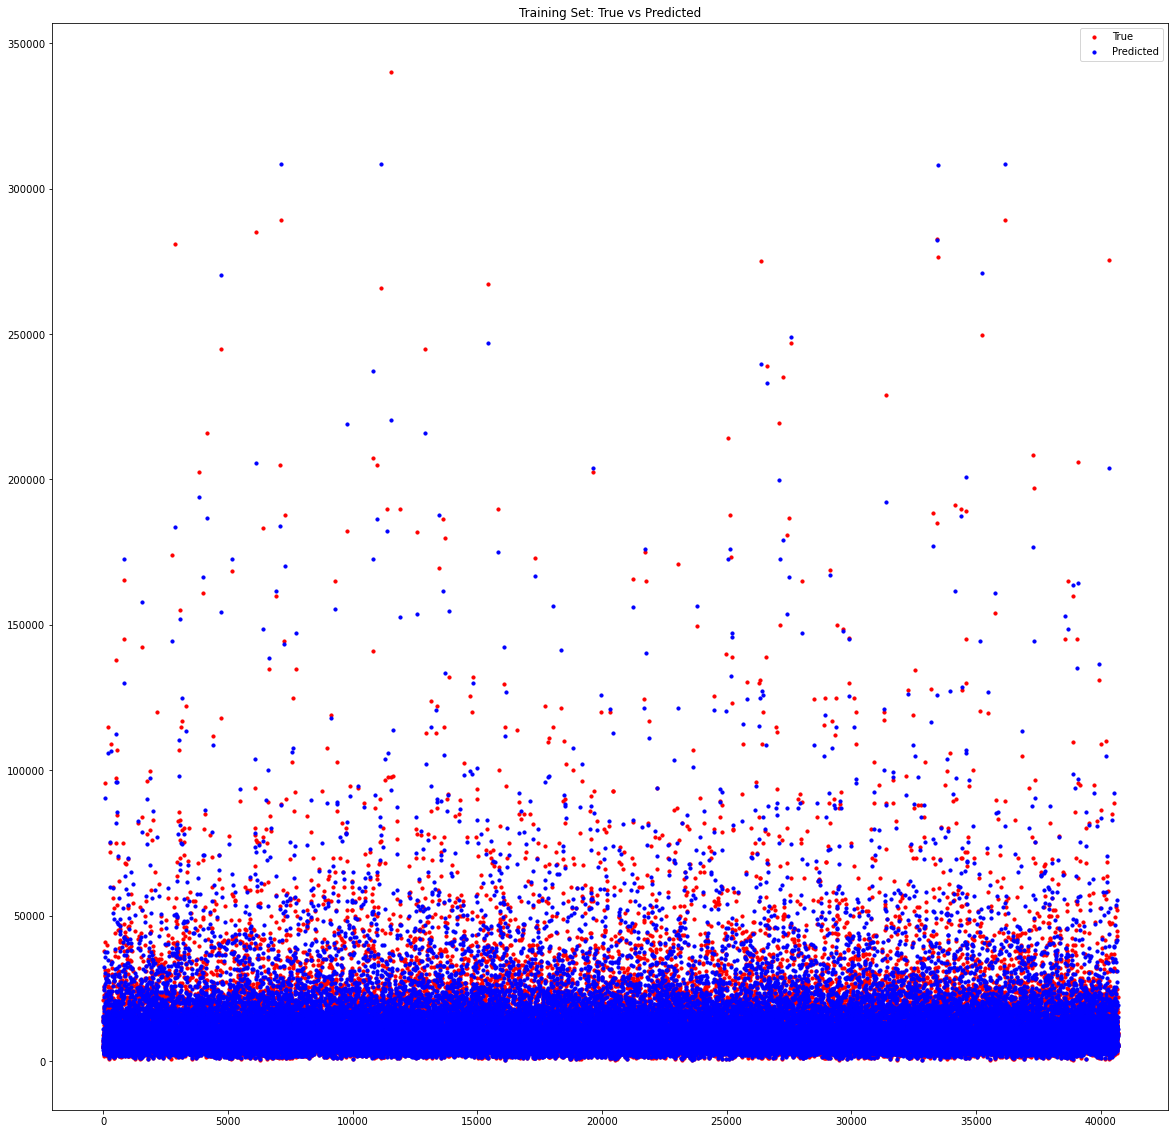

In [77]:
print("LightGBM Regressor Tuned") 
predicted_train_y = lgbm_best.predict(X)
evaluateRegressor(np.expm1(y),np.expm1(predicted_train_y),"    Training Set")
PlotPrediction(np.expm1(y),np.expm1(predicted_train_y),"Training Set: ")

    Test Set
MSE: 15668047.32067629
MAE: 1563.2613574603445
RMSE: 3958.2884332342796
LogRMSE: 0.174199709118756


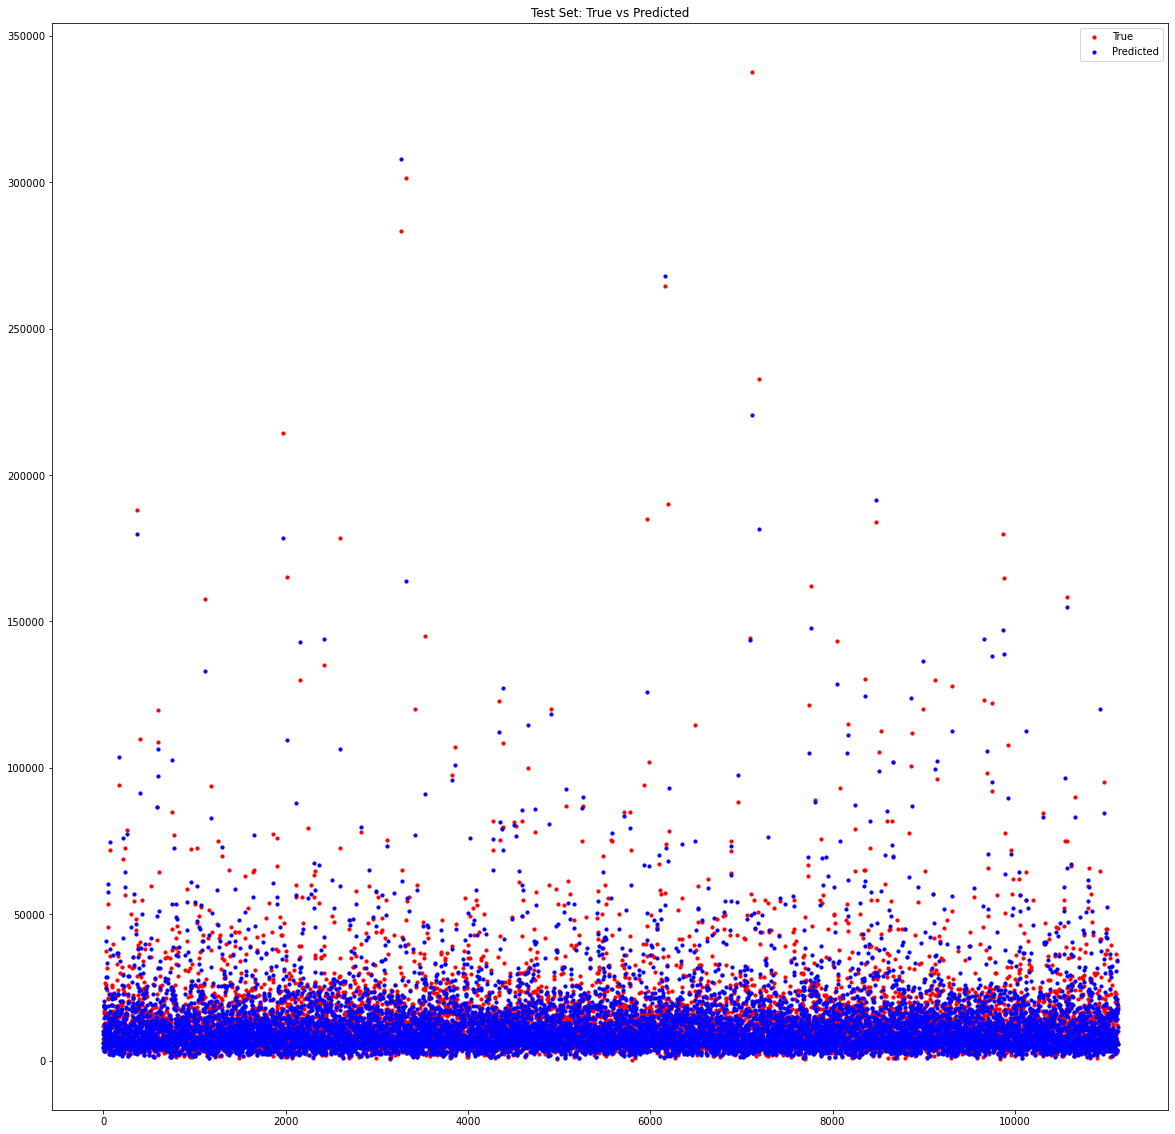

In [86]:
predicted_valid_y = lgbm_best.predict(X_test)
evaluateRegressor(np.expm1(y_test),np.expm1(predicted_valid_y),"    Test Set")
PlotPrediction(np.expm1(y_test),np.expm1(predicted_valid_y),"Test Set: ")

In [85]:
np.expm1(y_test)

0         5900.0
1         4700.0
2         7400.0
3        11800.0
4        16300.0
          ...   
11123     6700.0
11124    20000.0
11125     5777.0
11126    10000.0
11127    18500.0
Name: Price_USD, Length: 11128, dtype: float64

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

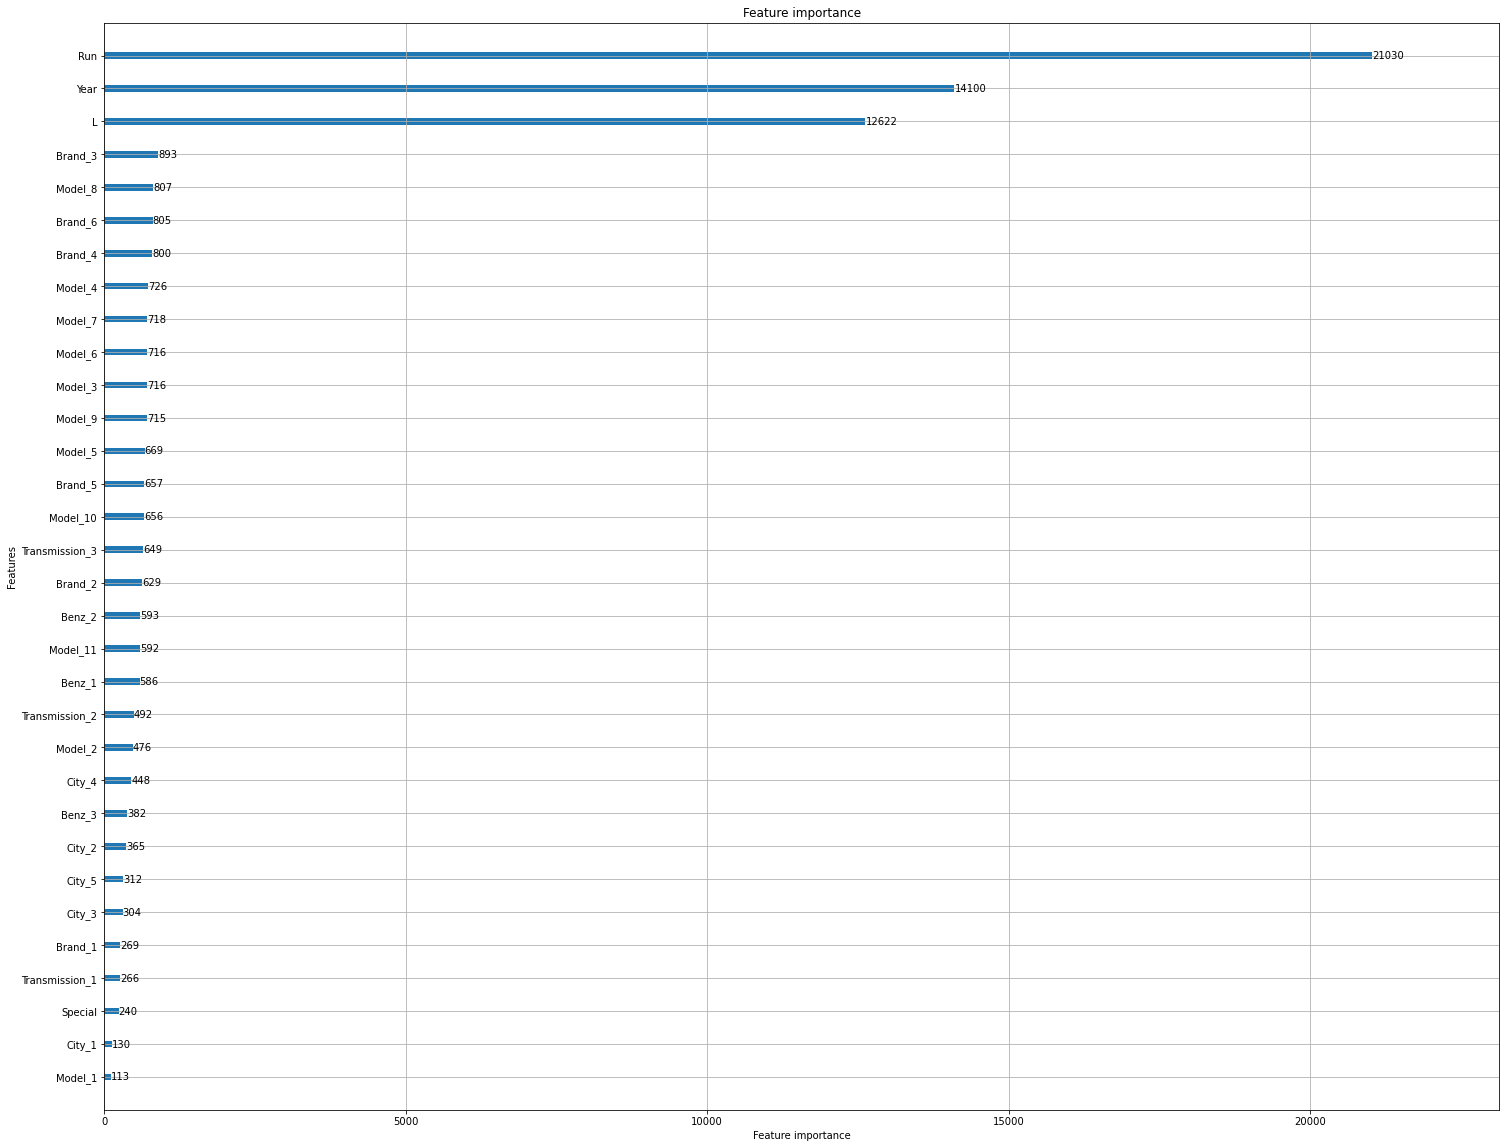

In [87]:
lgb.plot_importance(lgbm_best,figsize=(25,20))

In [88]:
lgbm_best.params

{'colsample_bytree': 0.8391979083800722,
 'lambda_l1': 0.6506473411889874,
 'lambda_l2': 1.0628044759476987,
 'learning_rate': 0.15512241386800715,
 'max_depth': 40,
 'min_child_weight': 30.189661888367475,
 'num_leaves': 26,
 'subsample': 0.7941293645003465,
 'verbose': -1,
 'metric': 'rmse',
 'boosting_type': 'gbdt',
 'objective': 'regression',
 'seed': 1,
 'num_iterations': 4246,
 'early_stopping_round': 500,
 'subsample_for_bin': 200000}

In [89]:
import json 
with open('../Data/Bayesian_params.json', 'w') as file:
    json.dump(lgbm_best.params, file)